In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras

In [ ]:
(x_train, y_train),(x_test , y_test) = keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [ ]:
# x_train = x_train.reshape(50000, 3072)
# x_test = x_test.reshape(x_test.shape[0], 3072)

In [ ]:
tf.device('/gpu:0')

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train, num_classes = 10)
y_test_cat = keras.utils.to_categorical(y_test, num_classes = 10 )
x_train = np.float32(x_train/255)
x_test = np.float32(x_test/255)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(keras.layers.Conv2D(32, (4,4), activation = "relu", input_shape = (32,32,3)))
model.add(keras.layers.AvgPool2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Conv2D(40, (3,3), activation = "sigmoid"))
model.add(keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1028, activation = "relu"))
model.add(keras.layers.Dense(10, activation = "softmax"))


In [ ]:
model.compile(optimizer= "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"]  )

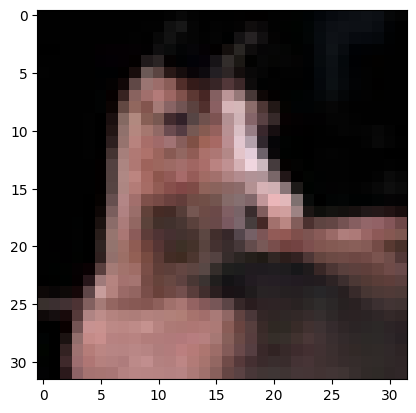

In [ ]:
plt.imshow(x_train[np.random.randint(102)])

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_test.shape

(10000, 1)

In [ ]:
model.fit(x_train, y_train_cat, epochs = 20, validation_data = (x_test, y_test_cat) , batch_size= 10)

Epoch 1/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 41s 8ms/step - accuracy: 0.2897 - loss: 1.9485 - val_accuracy: 0.4867 - val_loss: 1.4305
Epoch 2/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.4835 - loss: 1.4199 - val_accuracy: 0.5560 - val_loss: 1.2385
Epoch 3/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.5490 - loss: 1.2482 - val_accuracy: 0.5926 - val_loss: 1.1460
Epoch 4/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.5954 - loss: 1.1377 - val_accuracy: 0.6081 - val_loss: 1.0885
Epoch 5/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.6281 - loss: 1.0380 - val_accuracy: 0.6273 - val_loss: 1.0524
Epoch 6/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.6616 - loss: 0.9581 - val_accuracy: 0.6376 - val_loss: 1.0384
Epoch 7/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.6860 - loss: 0.8945 - val_accuracy: 0.6418 - val_loss: 1.0138
Epoch 8/20
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.7076 - loss: 0

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_classes = np.argmax(model.predict(x_test), axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
y_test_flat = y_test.flatten()

In [ ]:
x = confusion_matrix(y_test_flat , y_pred_classes)

In [ ]:
print(x)

[[736  20  41  17  24   8  16  12  81  45]
 [ 24 758   5  13   8   7  11   3  35 136]
 [ 68  15 476 109 113  71  73  37  20  18]
 [ 21   9  44 527  81 169  69  38  16  26]
 [ 31   3  64  91 594  38  66  84  16  13]
 [ 14   7  48 186  71 549  39  66   6  14]
 [ 10  15  38  72  51  27 762   9   5  11]
 [ 25  10  17  50  61  69   7 723   4  34]
 [ 80  45   5  14  16  11   7   1 776  45]
 [ 50  87   9  23   8  11   5  18  39 750]]


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 14, 14, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 40)     │        11,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 40)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1440)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1028)           │     1,481,348 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        10,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,514,300 (17.22 MB)

 Trainable params: 1,504,766 (5.74 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,009,534 (11.48 MB)